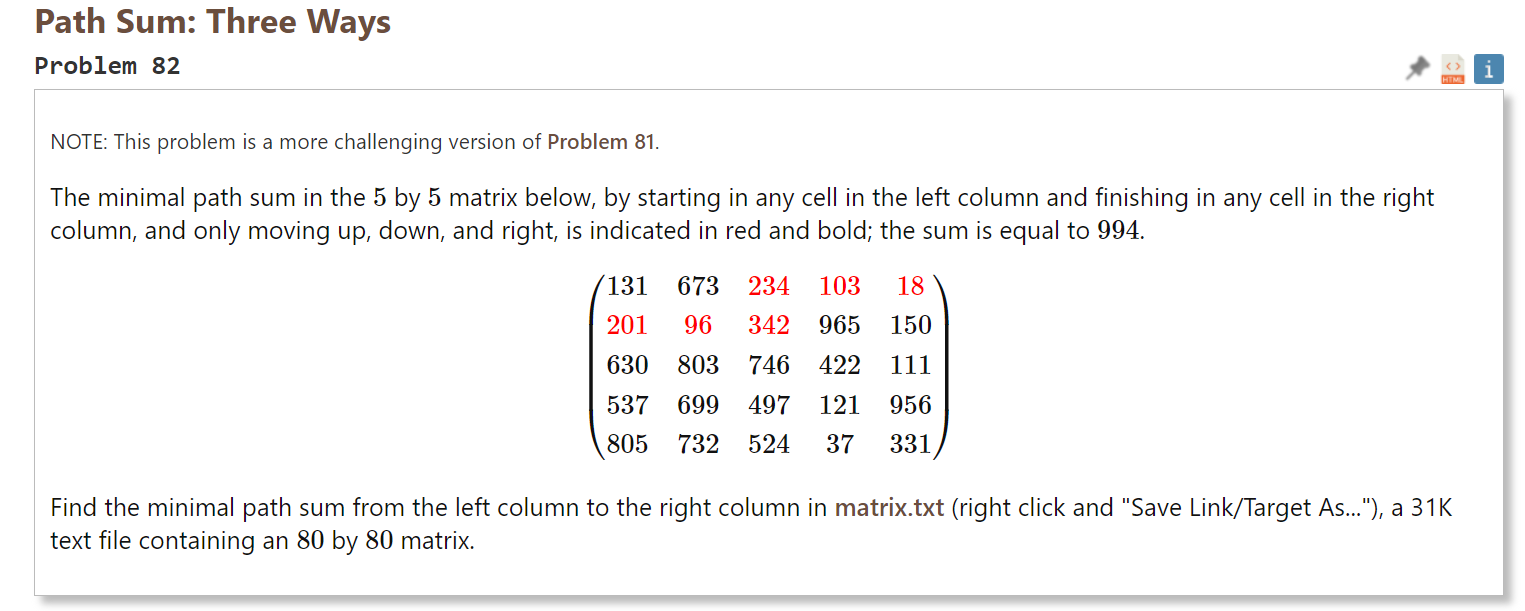

We can try to go from left to right, trying to find the minimum sum required to get to each value - given this matrix:  
4 1 3  
8 2 8  
3 7 9  
to work out the minimum sum required for the first column, well since we can start in any of these values their minumum is just the value itself, now we want to find the minimum sums for the next column, if we want to work out the minumum sum for the value 2, we can either take the route 4 -> 1 -> 2, 8 -> 2, 3 -> 7 -> 2, notice we do not think about 4 -> 8 -> 2 because every column we go along we are treating as a clean slate, as if we could have started in any of the values in that column.  
We can find the minimum values by first doing a downwards run, by this I mean assume we started from the top and are coming down, for instance we would go:  
1 can only have 4 go into it so 1 becomes 5, 2 now has either 8 to the left of it or 5 above it, so it becomes 7 (as it adds the minumum of these, 5), 7 now has 3 to the left and 7 above, so it becomes 10, now we have 
5  
7  
10  
Which represents the smallest sums assuming we are either coming from the left or the top, now we do the same but from the bottom:  
7 only has 3 so becomes 10, 2 has 10 below and 8 to the left so becomes 10, 1 has 10 below or 4 to the left so becomes 5, so we have these two possibilities per value:  
5/5  
7/8  
10/10  
these represent the minimum values given the two possible scenarios per number, so we take the minimum of these to give the minimum total possible per value now leaving:  
5 3  
7 8  
10 9  
re-run for the next column to give  
top to bottom: 3 -> 8, 8 -> 8 + min(7, 8) = 15, 9 -> 19  
bottom to top: 9 -> 19, 8 -> 15, 3 -> 8
giving:  
8  
15  
19  
we then take the minimum of this row giving 8 as the smallest sum left to right

In [8]:
bean = """
4,1,3
8,2,8
3,7,9
"""

In [9]:
burrito = """
131,673,234,103,18
201,96,342,965,150
630,803,746,422,111
537,699,497,121,956
805,732,524,37,331
"""

In [10]:
import numpy as np
def min_sum_three(matrix_str):
    # Get into right format
    matrix = [row.split(',') for row in matrix_str.split('\n') if row!='']
    matrix = [[int(val) for val in row] for row in matrix]
    # Transpose the matrix
    matrix = list(map(list, zip(*matrix)))
    for c_idx, col in enumerate(matrix):
        if c_idx==0:
            continue
        # Top to bottom
        top_bottom = col.copy()
        for r_idx, row in enumerate(top_bottom):
            
            left = matrix[c_idx-1][r_idx]
            above = top_bottom[r_idx-1] if r_idx > 0 else np.inf
            top_bottom[r_idx] += min(left, above)
        # Bottom to top
        bottom_top = col[::-1]
        for r_idx, row in enumerate(bottom_top):
            left = matrix[c_idx-1][(r_idx+1)*-1]
            below = bottom_top[r_idx-1] if r_idx > 0 else np.inf
            bottom_top[r_idx] += min(left, below)
        matrix[c_idx] = [min(top, bottom) for top, bottom in zip(top_bottom, bottom_top[::-1])]
    return min(matrix[-1])

In [11]:
min_sum_three(burrito)

994

In [12]:
big_boy = """
4445,2697,5115,718,2209,2212,654,4348,3079,6821,7668,3276,8874,4190,3785,2752,9473,7817,9137,496,7338,3434,7152,4355,4552,7917,7827,2460,2350,691,3514,5880,3145,7633,7199,3783,5066,7487,3285,1084,8985,760,872,8609,8051,1134,9536,5750,9716,9371,7619,5617,275,9721,2997,2698,1887,8825,6372,3014,2113,7122,7050,6775,5948,2758,1219,3539,348,7989,2735,9862,1263,8089,6401,9462,3168,2758,3748,5870
1096,20,1318,7586,5167,2642,1443,5741,7621,7030,5526,4244,2348,4641,9827,2448,6918,5883,3737,300,7116,6531,567,5997,3971,6623,820,6148,3287,1874,7981,8424,7672,7575,6797,6717,1078,5008,4051,8795,5820,346,1851,6463,2117,6058,3407,8211,117,4822,1317,4377,4434,5925,8341,4800,1175,4173,690,8978,7470,1295,3799,8724,3509,9849,618,3320,7068,9633,2384,7175,544,6583,1908,9983,481,4187,9353,9377
9607,7385,521,6084,1364,8983,7623,1585,6935,8551,2574,8267,4781,3834,2764,2084,2669,4656,9343,7709,2203,9328,8004,6192,5856,3555,2260,5118,6504,1839,9227,1259,9451,1388,7909,5733,6968,8519,9973,1663,5315,7571,3035,4325,4283,2304,6438,3815,9213,9806,9536,196,5542,6907,2475,1159,5820,9075,9470,2179,9248,1828,4592,9167,3713,4640,47,3637,309,7344,6955,346,378,9044,8635,7466,5036,9515,6385,9230
7206,3114,7760,1094,6150,5182,7358,7387,4497,955,101,1478,7777,6966,7010,8417,6453,4955,3496,107,449,8271,131,2948,6185,784,5937,8001,6104,8282,4165,3642,710,2390,575,715,3089,6964,4217,192,5949,7006,715,3328,1152,66,8044,4319,1735,146,4818,5456,6451,4113,1063,4781,6799,602,1504,6245,6550,1417,1343,2363,3785,5448,4545,9371,5420,5068,4613,4882,4241,5043,7873,8042,8434,3939,9256,2187
3620,8024,577,9997,7377,7682,1314,1158,6282,6310,1896,2509,5436,1732,9480,706,496,101,6232,7375,2207,2306,110,6772,3433,2878,8140,5933,8688,1399,2210,7332,6172,6403,7333,4044,2291,1790,2446,7390,8698,5723,3678,7104,1825,2040,140,3982,4905,4160,2200,5041,2512,1488,2268,1175,7588,8321,8078,7312,977,5257,8465,5068,3453,3096,1651,7906,253,9250,6021,8791,8109,6651,3412,345,4778,5152,4883,7505
1074,5438,9008,2679,5397,5429,2652,3403,770,9188,4248,2493,4361,8327,9587,707,9525,5913,93,1899,328,2876,3604,673,8576,6908,7659,2544,3359,3883,5273,6587,3065,1749,3223,604,9925,6941,2823,8767,7039,3290,3214,1787,7904,3421,7137,9560,8451,2669,9219,6332,1576,5477,6755,8348,4164,4307,2984,4012,6629,1044,2874,6541,4942,903,1404,9125,5160,8836,4345,2581,460,8438,1538,5507,668,3352,2678,6942
4295,1176,5596,1521,3061,9868,7037,7129,8933,6659,5947,5063,3653,9447,9245,2679,767,714,116,8558,163,3927,8779,158,5093,2447,5782,3967,1716,931,7772,8164,1117,9244,5783,7776,3846,8862,6014,2330,6947,1777,3112,6008,3491,1906,5952,314,4602,8994,5919,9214,3995,5026,7688,6809,5003,3128,2509,7477,110,8971,3982,8539,2980,4689,6343,5411,2992,5270,5247,9260,2269,7474,1042,7162,5206,1232,4556,4757
510,3556,5377,1406,5721,4946,2635,7847,4251,8293,8281,6351,4912,287,2870,3380,3948,5322,3840,4738,9563,1906,6298,3234,8959,1562,6297,8835,7861,239,6618,1322,2553,2213,5053,5446,4402,6500,5182,8585,6900,5756,9661,903,5186,7687,5998,7997,8081,8955,4835,6069,2621,1581,732,9564,1082,1853,5442,1342,520,1737,3703,5321,4793,2776,1508,1647,9101,2499,6891,4336,7012,3329,3212,1442,9993,3988,4930,7706
9444,3401,5891,9716,1228,7107,109,3563,2700,6161,5039,4992,2242,8541,7372,2067,1294,3058,1306,320,8881,5756,9326,411,8650,8824,5495,8282,8397,2000,1228,7817,2099,6473,3571,5994,4447,1299,5991,543,7874,2297,1651,101,2093,3463,9189,6872,6118,872,1008,1779,2805,9084,4048,2123,5877,55,3075,1737,9459,4535,6453,3644,108,5982,4437,5213,1340,6967,9943,5815,669,8074,1838,6979,9132,9315,715,5048
3327,4030,7177,6336,9933,5296,2621,4785,2755,4832,2512,2118,2244,4407,2170,499,7532,9742,5051,7687,970,6924,3527,4694,5145,1306,2165,5940,2425,8910,3513,1909,6983,346,6377,4304,9330,7203,6605,3709,3346,970,369,9737,5811,4427,9939,3693,8436,5566,1977,3728,2399,3985,8303,2492,5366,9802,9193,7296,1033,5060,9144,2766,1151,7629,5169,5995,58,7619,7565,4208,1713,6279,3209,4908,9224,7409,1325,8540
6882,1265,1775,3648,4690,959,5837,4520,5394,1378,9485,1360,4018,578,9174,2932,9890,3696,116,1723,1178,9355,7063,1594,1918,8574,7594,7942,1547,6166,7888,354,6932,4651,1010,7759,6905,661,7689,6092,9292,3845,9605,8443,443,8275,5163,7720,7265,6356,7779,1798,1754,5225,6661,1180,8024,5666,88,9153,1840,3508,1193,4445,2648,3538,6243,6375,8107,5902,5423,2520,1122,5015,6113,8859,9370,966,8673,2442
7338,3423,4723,6533,848,8041,7921,8277,4094,5368,7252,8852,9166,2250,2801,6125,8093,5738,4038,9808,7359,9494,601,9116,4946,2702,5573,2921,9862,1462,1269,2410,4171,2709,7508,6241,7522,615,2407,8200,4189,5492,5649,7353,2590,5203,4274,710,7329,9063,956,8371,3722,4253,4785,1194,4828,4717,4548,940,983,2575,4511,2938,1827,2027,2700,1236,841,5760,1680,6260,2373,3851,1841,4968,1172,5179,7175,3509
4420,1327,3560,2376,6260,2988,9537,4064,4829,8872,9598,3228,1792,7118,9962,9336,4368,9189,6857,1829,9863,6287,7303,7769,2707,8257,2391,2009,3975,4993,3068,9835,3427,341,8412,2134,4034,8511,6421,3041,9012,2983,7289,100,1355,7904,9186,6920,5856,2008,6545,8331,3655,5011,839,8041,9255,6524,3862,8788,62,7455,3513,5003,8413,3918,2076,7960,6108,3638,6999,3436,1441,4858,4181,1866,8731,7745,3744,1000
356,8296,8325,1058,1277,4743,3850,2388,6079,6462,2815,5620,8495,5378,75,4324,3441,9870,1113,165,1544,1179,2834,562,6176,2313,6836,8839,2986,9454,5199,6888,1927,5866,8760,320,1792,8296,7898,6121,7241,5886,5814,2815,8336,1576,4314,3109,2572,6011,2086,9061,9403,3947,5487,9731,7281,3159,1819,1334,3181,5844,5114,9898,4634,2531,4412,6430,4262,8482,4546,4555,6804,2607,9421,686,8649,8860,7794,6672
9870,152,1558,4963,8750,4754,6521,6256,8818,5208,5691,9659,8377,9725,5050,5343,2539,6101,1844,9700,7750,8114,5357,3001,8830,4438,199,9545,8496,43,2078,327,9397,106,6090,8181,8646,6414,7499,5450,4850,6273,5014,4131,7639,3913,6571,8534,9703,4391,7618,445,1320,5,1894,6771,7383,9191,4708,9706,6939,7937,8726,9382,5216,3685,2247,9029,8154,1738,9984,2626,9438,4167,6351,5060,29,1218,1239,4785
192,5213,8297,8974,4032,6966,5717,1179,6523,4679,9513,1481,3041,5355,9303,9154,1389,8702,6589,7818,6336,3539,5538,3094,6646,6702,6266,2759,4608,4452,617,9406,8064,6379,444,5602,4950,1810,8391,1536,316,8714,1178,5182,5863,5110,5372,4954,1978,2971,5680,4863,2255,4630,5723,2168,538,1692,1319,7540,440,6430,6266,7712,7385,5702,620,641,3136,7350,1478,3155,2820,9109,6261,1122,4470,14,8493,2095
1046,4301,6082,474,4974,7822,2102,5161,5172,6946,8074,9716,6586,9962,9749,5015,2217,995,5388,4402,7652,6399,6539,1349,8101,3677,1328,9612,7922,2879,231,5887,2655,508,4357,4964,3554,5930,6236,7384,4614,280,3093,9600,2110,7863,2631,6626,6620,68,1311,7198,7561,1768,5139,1431,221,230,2940,968,5283,6517,2146,1646,869,9402,7068,8645,7058,1765,9690,4152,2926,9504,2939,7504,6074,2944,6470,7859
4659,736,4951,9344,1927,6271,8837,8711,3241,6579,7660,5499,5616,3743,5801,4682,9748,8796,779,1833,4549,8138,4026,775,4170,2432,4174,3741,7540,8017,2833,4027,396,811,2871,1150,9809,2719,9199,8504,1224,540,2051,3519,7982,7367,2761,308,3358,6505,2050,4836,5090,7864,805,2566,2409,6876,3361,8622,5572,5895,3280,441,7893,8105,1634,2929,274,3926,7786,6123,8233,9921,2674,5340,1445,203,4585,3837
5759,338,7444,7968,7742,3755,1591,4839,1705,650,7061,2461,9230,9391,9373,2413,1213,431,7801,4994,2380,2703,6161,6878,8331,2538,6093,1275,5065,5062,2839,582,1014,8109,3525,1544,1569,8622,7944,2905,6120,1564,1839,5570,7579,1318,2677,5257,4418,5601,7935,7656,5192,1864,5886,6083,5580,6202,8869,1636,7907,4759,9082,5854,3185,7631,6854,5872,5632,5280,1431,2077,9717,7431,4256,8261,9680,4487,4752,4286
1571,1428,8599,1230,7772,4221,8523,9049,4042,8726,7567,6736,9033,2104,4879,4967,6334,6716,3994,1269,8995,6539,3610,7667,6560,6065,874,848,4597,1711,7161,4811,6734,5723,6356,6026,9183,2586,5636,1092,7779,7923,8747,6887,7505,9909,1792,3233,4526,3176,1508,8043,720,5212,6046,4988,709,5277,8256,3642,1391,5803,1468,2145,3970,6301,7767,2359,8487,9771,8785,7520,856,1605,8972,2402,2386,991,1383,5963
1822,4824,5957,6511,9868,4113,301,9353,6228,2881,2966,6956,9124,9574,9233,1601,7340,973,9396,540,4747,8590,9535,3650,7333,7583,4806,3593,2738,8157,5215,8472,2284,9473,3906,6982,5505,6053,7936,6074,7179,6688,1564,1103,6860,5839,2022,8490,910,7551,7805,881,7024,1855,9448,4790,1274,3672,2810,774,7623,4223,4850,6071,9975,4935,1915,9771,6690,3846,517,463,7624,4511,614,6394,3661,7409,1395,8127
8738,3850,9555,3695,4383,2378,87,6256,6740,7682,9546,4255,6105,2000,1851,4073,8957,9022,6547,5189,2487,303,9602,7833,1628,4163,6678,3144,8589,7096,8913,5823,4890,7679,1212,9294,5884,2972,3012,3359,7794,7428,1579,4350,7246,4301,7779,7790,3294,9547,4367,3549,1958,8237,6758,3497,3250,3456,6318,1663,708,7714,6143,6890,3428,6853,9334,7992,591,6449,9786,1412,8500,722,5468,1371,108,3939,4199,2535
7047,4323,1934,5163,4166,461,3544,2767,6554,203,6098,2265,9078,2075,4644,6641,8412,9183,487,101,7566,5622,1975,5726,2920,5374,7779,5631,3753,3725,2672,3621,4280,1162,5812,345,8173,9785,1525,955,5603,2215,2580,5261,2765,2990,5979,389,3907,2484,1232,5933,5871,3304,1138,1616,5114,9199,5072,7442,7245,6472,4760,6359,9053,7876,2564,9404,3043,9026,2261,3374,4460,7306,2326,966,828,3274,1712,3446
3975,4565,8131,5800,4570,2306,8838,4392,9147,11,3911,7118,9645,4994,2028,6062,5431,2279,8752,2658,7836,994,7316,5336,7185,3289,1898,9689,2331,5737,3403,1124,2679,3241,7748,16,2724,5441,6640,9368,9081,5618,858,4969,17,2103,6035,8043,7475,2181,939,415,1617,8500,8253,2155,7843,7974,7859,1746,6336,3193,2617,8736,4079,6324,6645,8891,9396,5522,6103,1857,8979,3835,2475,1310,7422,610,8345,7615
9248,5397,5686,2988,3446,4359,6634,9141,497,9176,6773,7448,1907,8454,916,1596,2241,1626,1384,2741,3649,5362,8791,7170,2903,2475,5325,6451,924,3328,522,90,4813,9737,9557,691,2388,1383,4021,1609,9206,4707,5200,7107,8104,4333,9860,5013,1224,6959,8527,1877,4545,7772,6268,621,4915,9349,5970,706,9583,3071,4127,780,8231,3017,9114,3836,7503,2383,1977,4870,8035,2379,9704,1037,3992,3642,1016,4303
5093,138,4639,6609,1146,5565,95,7521,9077,2272,974,4388,2465,2650,722,4998,3567,3047,921,2736,7855,173,2065,4238,1048,5,6847,9548,8632,9194,5942,4777,7910,8971,6279,7253,2516,1555,1833,3184,9453,9053,6897,7808,8629,4877,1871,8055,4881,7639,1537,7701,2508,7564,5845,5023,2304,5396,3193,2955,1088,3801,6203,1748,3737,1276,13,4120,7715,8552,3047,2921,106,7508,304,1280,7140,2567,9135,5266
6237,4607,7527,9047,522,7371,4883,2540,5867,6366,5301,1570,421,276,3361,527,6637,4861,2401,7522,5808,9371,5298,2045,5096,5447,7755,5115,7060,8529,4078,1943,1697,1764,5453,7085,960,2405,739,2100,5800,728,9737,5704,5693,1431,8979,6428,673,7540,6,7773,5857,6823,150,5869,8486,684,5816,9626,7451,5579,8260,3397,5322,6920,1879,2127,2884,5478,4977,9016,6165,6292,3062,5671,5968,78,4619,4763
9905,7127,9390,5185,6923,3721,9164,9705,4341,1031,1046,5127,7376,6528,3248,4941,1178,7889,3364,4486,5358,9402,9158,8600,1025,874,1839,1783,309,9030,1843,845,8398,1433,7118,70,8071,2877,3904,8866,6722,4299,10,1929,5897,4188,600,1889,3325,2485,6473,4474,7444,6992,4846,6166,4441,2283,2629,4352,7775,1101,2214,9985,215,8270,9750,2740,8361,7103,5930,8664,9690,8302,9267,344,2077,1372,1880,9550
5825,8517,7769,2405,8204,1060,3603,7025,478,8334,1997,3692,7433,9101,7294,7498,9415,5452,3850,3508,6857,9213,6807,4412,7310,854,5384,686,4978,892,8651,3241,2743,3801,3813,8588,6701,4416,6990,6490,3197,6838,6503,114,8343,5844,8646,8694,65,791,5979,2687,2621,2019,8097,1423,3644,9764,4921,3266,3662,5561,2476,8271,8138,6147,1168,3340,1998,9874,6572,9873,6659,5609,2711,3931,9567,4143,7833,8887
6223,2099,2700,589,4716,8333,1362,5007,2753,2848,4441,8397,7192,8191,4916,9955,6076,3370,6396,6971,3156,248,3911,2488,4930,2458,7183,5455,170,6809,6417,3390,1956,7188,577,7526,2203,968,8164,479,8699,7915,507,6393,4632,1597,7534,3604,618,3280,6061,9793,9238,8347,568,9645,2070,5198,6482,5000,9212,6655,5961,7513,1323,3872,6170,3812,4146,2736,67,3151,5548,2781,9679,7564,5043,8587,1893,4531
5826,3690,6724,2121,9308,6986,8106,6659,2142,1642,7170,2877,5757,6494,8026,6571,8387,9961,6043,9758,9607,6450,8631,8334,7359,5256,8523,2225,7487,1977,9555,8048,5763,2414,4948,4265,2427,8978,8088,8841,9208,9601,5810,9398,8866,9138,4176,5875,7212,3272,6759,5678,7649,4922,5422,1343,8197,3154,3600,687,1028,4579,2084,9467,4492,7262,7296,6538,7657,7134,2077,1505,7332,6890,8964,4879,7603,7400,5973,739
1861,1613,4879,1884,7334,966,2000,7489,2123,4287,1472,3263,4726,9203,1040,4103,6075,6049,330,9253,4062,4268,1635,9960,577,1320,3195,9628,1030,4092,4979,6474,6393,2799,6967,8687,7724,7392,9927,2085,3200,6466,8702,265,7646,8665,7986,7266,4574,6587,612,2724,704,3191,8323,9523,3002,704,5064,3960,8209,2027,2758,8393,4875,4641,9584,6401,7883,7014,768,443,5490,7506,1852,2005,8850,5776,4487,4269
4052,6687,4705,7260,6645,6715,3706,5504,8672,2853,1136,8187,8203,4016,871,1809,1366,4952,9294,5339,6872,2645,6083,7874,3056,5218,7485,8796,7401,3348,2103,426,8572,4163,9171,3176,948,7654,9344,3217,1650,5580,7971,2622,76,2874,880,2034,9929,1546,2659,5811,3754,7096,7436,9694,9960,7415,2164,953,2360,4194,2397,1047,2196,6827,575,784,2675,8821,6802,7972,5996,6699,2134,7577,2887,1412,4349,4380
4629,2234,6240,8132,7592,3181,6389,1214,266,1910,2451,8784,2790,1127,6932,1447,8986,2492,5476,397,889,3027,7641,5083,5776,4022,185,3364,5701,2442,2840,4160,9525,4828,6602,2614,7447,3711,4505,7745,8034,6514,4907,2605,7753,6958,7270,6936,3006,8968,439,2326,4652,3085,3425,9863,5049,5361,8688,297,7580,8777,7916,6687,8683,7141,306,9569,2384,1500,3346,4601,7329,9040,6097,2727,6314,4501,4974,2829
8316,4072,2025,6884,3027,1808,5714,7624,7880,8528,4205,8686,7587,3230,1139,7273,6163,6986,3914,9309,1464,9359,4474,7095,2212,7302,2583,9462,7532,6567,1606,4436,8981,5612,6796,4385,5076,2007,6072,3678,8331,1338,3299,8845,4783,8613,4071,1232,6028,2176,3990,2148,3748,103,9453,538,6745,9110,926,3125,473,5970,8728,7072,9062,1404,1317,5139,9862,6496,6062,3338,464,1600,2532,1088,8232,7739,8274,3873
2341,523,7096,8397,8301,6541,9844,244,4993,2280,7689,4025,4196,5522,7904,6048,2623,9258,2149,9461,6448,8087,7245,1917,8340,7127,8466,5725,6996,3421,5313,512,9164,9837,9794,8369,4185,1488,7210,1524,1016,4620,9435,2478,7765,8035,697,6677,3724,6988,5853,7662,3895,9593,1185,4727,6025,5734,7665,3070,138,8469,6748,6459,561,7935,8646,2378,462,7755,3115,9690,8877,3946,2728,8793,244,6323,8666,4271
6430,2406,8994,56,1267,3826,9443,7079,7579,5232,6691,3435,6718,5698,4144,7028,592,2627,217,734,6194,8156,9118,58,2640,8069,4127,3285,694,3197,3377,4143,4802,3324,8134,6953,7625,3598,3584,4289,7065,3434,2106,7132,5802,7920,9060,7531,3321,1725,1067,3751,444,5503,6785,7937,6365,4803,198,6266,8177,1470,6390,1606,2904,7555,9834,8667,2033,1723,5167,1666,8546,8152,473,4475,6451,7947,3062,3281
2810,3042,7759,1741,2275,2609,7676,8640,4117,1958,7500,8048,1757,3954,9270,1971,4796,2912,660,5511,3553,1012,5757,4525,6084,7198,8352,5775,7726,8591,7710,9589,3122,4392,6856,5016,749,2285,3356,7482,9956,7348,2599,8944,495,3462,3578,551,4543,7207,7169,7796,1247,4278,6916,8176,3742,8385,2310,1345,8692,2667,4568,1770,8319,3585,4920,3890,4928,7343,5385,9772,7947,8786,2056,9266,3454,2807,877,2660
6206,8252,5928,5837,4177,4333,207,7934,5581,9526,8906,1498,8411,2984,5198,5134,2464,8435,8514,8674,3876,599,5327,826,2152,4084,2433,9327,9697,4800,2728,3608,3849,3861,3498,9943,1407,3991,7191,9110,5666,8434,4704,6545,5944,2357,1163,4995,9619,6754,4200,9682,6654,4862,4744,5953,6632,1054,293,9439,8286,2255,696,8709,1533,1844,6441,430,1999,6063,9431,7018,8057,2920,6266,6799,356,3597,4024,6665
3847,6356,8541,7225,2325,2946,5199,469,5450,7508,2197,9915,8284,7983,6341,3276,3321,16,1321,7608,5015,3362,8491,6968,6818,797,156,2575,706,9516,5344,5457,9210,5051,8099,1617,9951,7663,8253,9683,2670,1261,4710,1068,8753,4799,1228,2621,3275,6188,4699,1791,9518,8701,5932,4275,6011,9877,2933,4182,6059,2930,6687,6682,9771,654,9437,3169,8596,1827,5471,8909,2352,123,4394,3208,8756,5513,6917,2056
5458,8173,3138,3290,4570,4892,3317,4251,9699,7973,1163,1935,5477,6648,9614,5655,9592,975,9118,2194,7322,8248,8413,3462,8560,1907,7810,6650,7355,2939,4973,6894,3933,3784,3200,2419,9234,4747,2208,2207,1945,2899,1407,6145,8023,3484,5688,7686,2737,3828,3704,9004,5190,9740,8643,8650,5358,4426,1522,1707,3613,9887,6956,2447,2762,833,1449,9489,2573,1080,4167,3456,6809,2466,227,7125,2759,6250,6472,8089
3266,7025,9756,3914,1265,9116,7723,9788,6805,5493,2092,8688,6592,9173,4431,4028,6007,7131,4446,4815,3648,6701,759,3312,8355,4485,4187,5188,8746,7759,3528,2177,5243,8379,3838,7233,4607,9187,7216,2190,6967,2920,6082,7910,5354,3609,8958,6949,7731,494,8753,8707,1523,4426,3543,7085,647,6771,9847,646,5049,824,8417,5260,2730,5702,2513,9275,4279,2767,8684,1165,9903,4518,55,9682,8963,6005,2102,6523
1998,8731,936,1479,5259,7064,4085,91,7745,7136,3773,3810,730,8255,2705,2653,9790,6807,2342,355,9344,2668,3690,2028,9679,8102,574,4318,6481,9175,5423,8062,2867,9657,7553,3442,3920,7430,3945,7639,3714,3392,2525,4995,4850,2867,7951,9667,486,9506,9888,781,8866,1702,3795,90,356,1483,4200,2131,6969,5931,486,6880,4404,1084,5169,4910,6567,8335,4686,5043,2614,3352,2667,4513,6472,7471,5720,1616
8878,1613,1716,868,1906,2681,564,665,5995,2474,7496,3432,9491,9087,8850,8287,669,823,347,6194,2264,2592,7871,7616,8508,4827,760,2676,4660,4881,7572,3811,9032,939,4384,929,7525,8419,5556,9063,662,8887,7026,8534,3111,1454,2082,7598,5726,6687,9647,7608,73,3014,5063,670,5461,5631,3367,9796,8475,7908,5073,1565,5008,5295,4457,1274,4788,1728,338,600,8415,8535,9351,7750,6887,5845,1741,125
3637,6489,9634,9464,9055,2413,7824,9517,7532,3577,7050,6186,6980,9365,9782,191,870,2497,8498,2218,2757,5420,6468,586,3320,9230,1034,1393,9886,5072,9391,1178,8464,8042,6869,2075,8275,3601,7715,9470,8786,6475,8373,2159,9237,2066,3264,5000,679,355,3069,4073,494,2308,5512,4334,9438,8786,8637,9774,1169,1949,6594,6072,4270,9158,7916,5752,6794,9391,6301,5842,3285,2141,3898,8027,4310,8821,7079,1307
8497,6681,4732,7151,7060,5204,9030,7157,833,5014,8723,3207,9796,9286,4913,119,5118,7650,9335,809,3675,2597,5144,3945,5090,8384,187,4102,1260,2445,2792,4422,8389,9290,50,1765,1521,6921,8586,4368,1565,5727,7855,2003,4834,9897,5911,8630,5070,1330,7692,7557,7980,6028,5805,9090,8265,3019,3802,698,9149,5748,1965,9658,4417,5994,5584,8226,2937,272,5743,1278,5698,8736,2595,6475,5342,6596,1149,6920
8188,8009,9546,6310,8772,2500,9846,6592,6872,3857,1307,8125,7042,1544,6159,2330,643,4604,7899,6848,371,8067,2062,3200,7295,1857,9505,6936,384,2193,2190,301,8535,5503,1462,7380,5114,4824,8833,1763,4974,8711,9262,6698,3999,2645,6937,7747,1128,2933,3556,7943,2885,3122,9105,5447,418,2899,5148,3699,9021,9501,597,4084,175,1621,1,1079,6067,5812,4326,9914,6633,5394,4233,6728,9084,1864,5863,1225
9935,8793,9117,1825,9542,8246,8437,3331,9128,9675,6086,7075,319,1334,7932,3583,7167,4178,1726,7720,695,8277,7887,6359,5912,1719,2780,8529,1359,2013,4498,8072,1129,9998,1147,8804,9405,6255,1619,2165,7491,1,8882,7378,3337,503,5758,4109,3577,985,3200,7615,8058,5032,1080,6410,6873,5496,1466,2412,9885,5904,4406,3605,8770,4361,6205,9193,1537,9959,214,7260,9566,1685,100,4920,7138,9819,5637,976
3466,9854,985,1078,7222,8888,5466,5379,3578,4540,6853,8690,3728,6351,7147,3134,6921,9692,857,3307,4998,2172,5783,3931,9417,2541,6299,13,787,2099,9131,9494,896,8600,1643,8419,7248,2660,2609,8579,91,6663,5506,7675,1947,6165,4286,1972,9645,3805,1663,1456,8853,5705,9889,7489,1107,383,4044,2969,3343,152,7805,4980,9929,5033,1737,9953,7197,9158,4071,1324,473,9676,3984,9680,3606,8160,7384,5432
1005,4512,5186,3953,2164,3372,4097,3247,8697,3022,9896,4101,3871,6791,3219,2742,4630,6967,7829,5991,6134,1197,1414,8923,8787,1394,8852,5019,7768,5147,8004,8825,5062,9625,7988,1110,3992,7984,9966,6516,6251,8270,421,3723,1432,4830,6935,8095,9059,2214,6483,6846,3120,1587,6201,6691,9096,9627,6671,4002,3495,9939,7708,7465,5879,6959,6634,3241,3401,2355,9061,2611,7830,3941,2177,2146,5089,7079,519,6351
7280,8586,4261,2831,7217,3141,9994,9940,5462,2189,4005,6942,9848,5350,8060,6665,7519,4324,7684,657,9453,9296,2944,6843,7499,7847,1728,9681,3906,6353,5529,2822,3355,3897,7724,4257,7489,8672,4356,3983,1948,6892,7415,4153,5893,4190,621,1736,4045,9532,7701,3671,1211,1622,3176,4524,9317,7800,5638,6644,6943,5463,3531,2821,1347,5958,3436,1438,2999,994,850,4131,2616,1549,3465,5946,690,9273,6954,7991
9517,399,3249,2596,7736,2142,1322,968,7350,1614,468,3346,3265,7222,6086,1661,5317,2582,7959,4685,2807,2917,1037,5698,1529,3972,8716,2634,3301,3412,8621,743,8001,4734,888,7744,8092,3671,8941,1487,5658,7099,2781,99,1932,4443,4756,4652,9328,1581,7855,4312,5976,7255,6480,3996,2748,1973,9731,4530,2790,9417,7186,5303,3557,351,7182,9428,1342,9020,7599,1392,8304,2070,9138,7215,2008,9937,1106,7110
7444,769,9688,632,1571,6820,8743,4338,337,3366,3073,1946,8219,104,4210,6986,249,5061,8693,7960,6546,1004,8857,5997,9352,4338,6105,5008,2556,6518,6694,4345,3727,7956,20,3954,8652,4424,9387,2035,8358,5962,5304,5194,8650,8282,1256,1103,2138,6679,1985,3653,2770,2433,4278,615,2863,1715,242,3790,2636,6998,3088,1671,2239,957,5411,4595,6282,2881,9974,2401,875,7574,2987,4587,3147,6766,9885,2965
3287,3016,3619,6818,9073,6120,5423,557,2900,2015,8111,3873,1314,4189,1846,4399,7041,7583,2427,2864,3525,5002,2069,748,1948,6015,2684,438,770,8367,1663,7887,7759,1885,157,7770,4520,4878,3857,1137,3525,3050,6276,5569,7649,904,4533,7843,2199,5648,7628,9075,9441,3600,7231,2388,5640,9096,958,3058,584,5899,8150,1181,9616,1098,8162,6819,8171,1519,1140,7665,8801,2632,1299,9192,707,9955,2710,7314
1772,2963,7578,3541,3095,1488,7026,2634,6015,4633,4370,2762,1650,2174,909,8158,2922,8467,4198,4280,9092,8856,8835,5457,2790,8574,9742,5054,9547,4156,7940,8126,9824,7340,8840,6574,3547,1477,3014,6798,7134,435,9484,9859,3031,4,1502,4133,1738,1807,4825,463,6343,9701,8506,9822,9555,8688,8168,3467,3234,6318,1787,5591,419,6593,7974,8486,9861,6381,6758,194,3061,4315,2863,4665,3789,2201,1492,4416
126,8927,6608,5682,8986,6867,1715,6076,3159,788,3140,4744,830,9253,5812,5021,7616,8534,1546,9590,1101,9012,9821,8132,7857,4086,1069,7491,2988,1579,2442,4321,2149,7642,6108,250,6086,3167,24,9528,7663,2685,1220,9196,1397,5776,1577,1730,5481,977,6115,199,6326,2183,3767,5928,5586,7561,663,8649,9688,949,5913,9160,1870,5764,9887,4477,6703,1413,4995,5494,7131,2192,8969,7138,3997,8697,646,1028
8074,1731,8245,624,4601,8706,155,8891,309,2552,8208,8452,2954,3124,3469,4246,3352,1105,4509,8677,9901,4416,8191,9283,5625,7120,2952,8881,7693,830,4580,8228,9459,8611,4499,1179,4988,1394,550,2336,6089,6872,269,7213,1848,917,6672,4890,656,1478,6536,3165,4743,4990,1176,6211,7207,5284,9730,4738,1549,4986,4942,8645,3698,9429,1439,2175,6549,3058,6513,1574,6988,8333,3406,5245,5431,7140,7085,6407
7845,4694,2530,8249,290,5948,5509,1588,5940,4495,5866,5021,4626,3979,3296,7589,4854,1998,5627,3926,8346,6512,9608,1918,7070,4747,4182,2858,2766,4606,6269,4107,8982,8568,9053,4244,5604,102,2756,727,5887,2566,7922,44,5986,621,1202,374,6988,4130,3627,6744,9443,4568,1398,8679,397,3928,9159,367,2917,6127,5788,3304,8129,911,2669,1463,9749,264,4478,8940,1109,7309,2462,117,4692,7724,225,2312
4164,3637,2000,941,8903,39,3443,7172,1031,3687,4901,8082,4945,4515,7204,9310,9349,9535,9940,218,1788,9245,2237,1541,5670,6538,6047,5553,9807,8101,1925,8714,445,8332,7309,6830,5786,5736,7306,2710,3034,1838,7969,6318,7912,2584,2080,7437,6705,2254,7428,820,782,9861,7596,3842,3631,8063,5240,6666,394,4565,7865,4895,9890,6028,6117,4724,9156,4473,4552,602,470,6191,4927,5387,884,3146,1978,3000
4258,6880,1696,3582,5793,4923,2119,1155,9056,9698,6603,3768,5514,9927,9609,6166,6566,4536,4985,4934,8076,9062,6741,6163,7399,4562,2337,5600,2919,9012,8459,1308,6072,1225,9306,8818,5886,7243,7365,8792,6007,9256,6699,7171,4230,7002,8720,7839,4533,1671,478,7774,1607,2317,5437,4705,7886,4760,6760,7271,3081,2997,3088,7675,6208,3101,6821,6840,122,9633,4900,2067,8546,4549,2091,7188,5605,8599,6758,5229
7854,5243,9155,3556,8812,7047,2202,1541,5993,4600,4760,713,434,7911,7426,7414,8729,322,803,7960,7563,4908,6285,6291,736,3389,9339,4132,8701,7534,5287,3646,592,3065,7582,2592,8755,6068,8597,1982,5782,1894,2900,6236,4039,6569,3037,5837,7698,700,7815,2491,7272,5878,3083,6778,6639,3589,5010,8313,2581,6617,5869,8402,6808,2951,2321,5195,497,2190,6187,1342,1316,4453,7740,4154,2959,1781,1482,8256
7178,2046,4419,744,8312,5356,6855,8839,319,2962,5662,47,6307,8662,68,4813,567,2712,9931,1678,3101,8227,6533,4933,6656,92,5846,4780,6256,6361,4323,9985,1231,2175,7178,3034,9744,6155,9165,7787,5836,9318,7860,9644,8941,6480,9443,8188,5928,161,6979,2352,5628,6991,1198,8067,5867,6620,3778,8426,2994,3122,3124,6335,3918,8897,2655,9670,634,1088,1576,8935,7255,474,8166,7417,9547,2886,5560,3842
6957,3111,26,7530,7143,1295,1744,6057,3009,1854,8098,5405,2234,4874,9447,2620,9303,27,7410,969,40,2966,5648,7596,8637,4238,3143,3679,7187,690,9980,7085,7714,9373,5632,7526,6707,3951,9734,4216,2146,3602,5371,6029,3039,4433,4855,4151,1449,3376,8009,7240,7027,4602,2947,9081,4045,8424,9352,8742,923,2705,4266,3232,2264,6761,363,2651,3383,7770,6730,7856,7340,9679,2158,610,4471,4608,910,6241
4417,6756,1013,8797,658,8809,5032,8703,7541,846,3357,2920,9817,1745,9980,7593,4667,3087,779,3218,6233,5568,4296,2289,2654,7898,5021,9461,5593,8214,9173,4203,2271,7980,2983,5952,9992,8399,3468,1776,3188,9314,1720,6523,2933,621,8685,5483,8986,6163,3444,9539,4320,155,3992,2828,2150,6071,524,2895,5468,8063,1210,3348,9071,4862,483,9017,4097,6186,9815,3610,5048,1644,1003,9865,9332,2145,1944,2213
9284,3803,4920,1927,6706,4344,7383,4786,9890,2010,5228,1224,3158,6967,8580,8990,8883,5213,76,8306,2031,4980,5639,9519,7184,5645,7769,3259,8077,9130,1317,3096,9624,3818,1770,695,2454,947,6029,3474,9938,3527,5696,4760,7724,7738,2848,6442,5767,6845,8323,4131,2859,7595,2500,4815,3660,9130,8580,7016,8231,4391,8369,3444,4069,4021,556,6154,627,2778,1496,4206,6356,8434,8491,3816,8231,3190,5575,1015
3787,7572,1788,6803,5641,6844,1961,4811,8535,9914,9999,1450,8857,738,4662,8569,6679,2225,7839,8618,286,2648,5342,2294,3205,4546,176,8705,3741,6134,8324,8021,7004,5205,7032,6637,9442,5539,5584,4819,5874,5807,8589,6871,9016,983,1758,3786,1519,6241,185,8398,495,3370,9133,3051,4549,9674,7311,9738,3316,9383,2658,2776,9481,7558,619,3943,3324,6491,4933,153,9738,4623,912,3595,7771,7939,1219,4405
2650,3883,4154,5809,315,7756,4430,1788,4451,1631,6461,7230,6017,5751,138,588,5282,2442,9110,9035,6349,2515,1570,6122,4192,4174,3530,1933,4186,4420,4609,5739,4135,2963,6308,1161,8809,8619,2796,3819,6971,8228,4188,1492,909,8048,2328,6772,8467,7671,9068,2226,7579,6422,7056,8042,3296,2272,3006,2196,7320,3238,3490,3102,37,1293,3212,4767,5041,8773,5794,4456,6174,7279,7054,2835,7053,9088,790,6640
3101,1057,7057,3826,6077,1025,2955,1224,1114,6729,5902,4698,6239,7203,9423,1804,4417,6686,1426,6941,8071,1029,4985,9010,6122,6597,1622,1574,3513,1684,7086,5505,3244,411,9638,4150,907,9135,829,981,1707,5359,8781,9751,5,9131,3973,7159,1340,6955,7514,7993,6964,8198,1933,2797,877,3993,4453,8020,9349,8646,2779,8679,2961,3547,3374,3510,1129,3568,2241,2625,9138,5974,8206,7669,7678,1833,8700,4480
4865,9912,8038,8238,782,3095,8199,1127,4501,7280,2112,2487,3626,2790,9432,1475,6312,8277,4827,2218,5806,7132,8752,1468,7471,6386,739,8762,8323,8120,5169,9078,9058,3370,9560,7987,8585,8531,5347,9312,1058,4271,1159,5286,5404,6925,8606,9204,7361,2415,560,586,4002,2644,1927,2824,768,4409,2942,3345,1002,808,4941,6267,7979,5140,8643,7553,9438,7320,4938,2666,4609,2778,8158,6730,3748,3867,1866,7181
171,3771,7134,8927,4778,2913,3326,2004,3089,7853,1378,1729,4777,2706,9578,1360,5693,3036,1851,7248,2403,2273,8536,6501,9216,613,9671,7131,7719,6425,773,717,8803,160,1114,7554,7197,753,4513,4322,8499,4533,2609,4226,8710,6627,644,9666,6260,4870,5744,7385,6542,6203,7703,6130,8944,5589,2262,6803,6381,7414,6888,5123,7320,9392,9061,6780,322,8975,7050,5089,1061,2260,3199,1150,1865,5386,9699,6501
3744,8454,6885,8277,919,1923,4001,6864,7854,5519,2491,6057,8794,9645,1776,5714,9786,9281,7538,6916,3215,395,2501,9618,4835,8846,9708,2813,3303,1794,8309,7176,2206,1602,1838,236,4593,2245,8993,4017,10,8215,6921,5206,4023,5932,6997,7801,262,7640,3107,8275,4938,7822,2425,3223,3886,2105,8700,9526,2088,8662,8034,7004,5710,2124,7164,3574,6630,9980,4242,2901,9471,1491,2117,4562,1130,9086,4117,6698
2810,2280,2331,1170,4554,4071,8387,1215,2274,9848,6738,1604,7281,8805,439,1298,8318,7834,9426,8603,6092,7944,1309,8828,303,3157,4638,4439,9175,1921,4695,7716,1494,1015,1772,5913,1127,1952,1950,8905,4064,9890,385,9357,7945,5035,7082,5369,4093,6546,5187,5637,2041,8946,1758,7111,6566,1027,1049,5148,7224,7248,296,6169,375,1656,7993,2816,3717,4279,4675,1609,3317,42,6201,3100,3144,163,9530,4531
7096,6070,1009,4988,3538,5801,7149,3063,2324,2912,7911,7002,4338,7880,2481,7368,3516,2016,7556,2193,1388,3865,8125,4637,4096,8114,750,3144,1938,7002,9343,4095,1392,4220,3455,6969,9647,1321,9048,1996,1640,6626,1788,314,9578,6630,2813,6626,4981,9908,7024,4355,3201,3521,3864,3303,464,1923,595,9801,3391,8366,8084,9374,1041,8807,9085,1892,9431,8317,9016,9221,8574,9981,9240,5395,2009,6310,2854,9255
8830,3145,2960,9615,8220,6061,3452,2918,6481,9278,2297,3385,6565,7066,7316,5682,107,7646,4466,68,1952,9603,8615,54,7191,791,6833,2560,693,9733,4168,570,9127,9537,1925,8287,5508,4297,8452,8795,6213,7994,2420,4208,524,5915,8602,8330,2651,8547,6156,1812,6271,7991,9407,9804,1553,6866,1128,2119,4691,9711,8315,5879,9935,6900,482,682,4126,1041,428,6247,3720,5882,7526,2582,4327,7725,3503,2631
2738,9323,721,7434,1453,6294,2957,3786,5722,6019,8685,4386,3066,9057,6860,499,5315,3045,5194,7111,3137,9104,941,586,3066,755,4177,8819,7040,5309,3583,3897,4428,7788,4721,7249,6559,7324,825,7311,3760,6064,6070,9672,4882,584,1365,9739,9331,5783,2624,7889,1604,1303,1555,7125,8312,425,8936,3233,7724,1480,403,7440,1784,1754,4721,1569,652,3893,4574,5692,9730,4813,9844,8291,9199,7101,3391,8914
6044,2928,9332,3328,8588,447,3830,1176,3523,2705,8365,6136,5442,9049,5526,8575,8869,9031,7280,706,2794,8814,5767,4241,7696,78,6570,556,5083,1426,4502,3336,9518,2292,1885,3740,3153,9348,9331,8051,2759,5407,9028,7840,9255,831,515,2612,9747,7435,8964,4971,2048,4900,5967,8271,1719,9670,2810,6777,1594,6367,6259,8316,3815,1689,6840,9437,4361,822,9619,3065,83,6344,7486,8657,8228,9635,6932,4864
8478,4777,6334,4678,7476,4963,6735,3096,5860,1405,5127,7269,7793,4738,227,9168,2996,8928,765,733,1276,7677,6258,1528,9558,3329,302,8901,1422,8277,6340,645,9125,8869,5952,141,8141,1816,9635,4025,4184,3093,83,2344,2747,9352,7966,1206,1126,1826,218,7939,2957,2729,810,8752,5247,4174,4038,8884,7899,9567,301,5265,5752,7524,4381,1669,3106,8270,6228,6373,754,2547,4240,2313,5514,3022,1040,9738
2265,8192,1763,1369,8469,8789,4836,52,1212,6690,5257,8918,6723,6319,378,4039,2421,8555,8184,9577,1432,7139,8078,5452,9628,7579,4161,7490,5159,8559,1011,81,478,5840,1964,1334,6875,8670,9900,739,1514,8692,522,9316,6955,1345,8132,2277,3193,9773,3923,4177,2183,1236,6747,6575,4874,6003,6409,8187,745,8776,9440,7543,9825,2582,7381,8147,7236,5185,7564,6125,218,7991,6394,391,7659,7456,5128,5294
2132,8992,8160,5782,4420,3371,3798,5054,552,5631,7546,4716,1332,6486,7892,7441,4370,6231,4579,2121,8615,1145,9391,1524,1385,2400,9437,2454,7896,7467,2928,8400,3299,4025,7458,4703,7206,6358,792,6200,725,4275,4136,7390,5984,4502,7929,5085,8176,4600,119,3568,76,9363,6943,2248,9077,9731,6213,5817,6729,4190,3092,6910,759,2682,8380,1254,9604,3011,9291,5329,9453,9746,2739,6522,3765,5634,1113,5789
5304,5499,564,2801,679,2653,1783,3608,7359,7797,3284,796,3222,437,7185,6135,8571,2778,7488,5746,678,6140,861,7750,803,9859,9918,2425,3734,2698,9005,4864,9818,6743,2475,132,9486,3825,5472,919,292,4411,7213,7699,6435,9019,6769,1388,802,2124,1345,8493,9487,8558,7061,8777,8833,2427,2238,5409,4957,8503,3171,7622,5779,6145,2417,5873,5563,5693,9574,9491,1937,7384,4563,6842,5432,2751,3406,7981"""

In [13]:
min_sum_three(big_boy)

260324

In [14]:
%%timeit
min_sum_three(big_boy)

6.33 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
